# **Aula 1: Explore dados com pandas**

In [ ]:
import pandas as pd

Após importar o pandas, fiz a leitura dos dados para a aula abaixo:


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
df.shape

(133349, 11)

In [ ]:
linhas, colunas = df.shape[0], df.shape[1]

print("linhas:", linhas)
print("colunas:", colunas)

linhas: 133349
colunas: 11


In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
df.rename(columns={
    'work_yea': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}, inplace=True)

display(df.columns)

Index(['work_year', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda',
       'usd', 'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [ ]:
df["senioridade"].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [ ]:
df["contrato"].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


Nos meus dados todos os funcionários trabalham em tempo integral. é isso que o 'FT' significa.

In [ ]:
df["remoto"].value_counts()

,count
remoto,
0,105312
100,27718
50,319


Número 0 trabalho presencial e o numero 100 são remotas.

In [ ]:
df["tamanho_empresa"].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


M empresa de tamanho médio.

In [ ]:
df['senioridade'] = df['senioridade'].replace({
    'EN': 'Iniciante',
    'MI': 'Intermediário',
    'SE': 'Sênior',
    'EX': 'Executivo'
})

display(df['senioridade'].value_counts())

,count
senioridade,
Sênior,77241
Intermediário,40465
Iniciante,12443
Executivo,3200


In [ ]:
df['contrato'] = df['contrato'].replace({
    'FT': 'Tempo Integral',
    'PT': 'Tempo Parcial',
    'CT': 'Contrato',
    'FL': 'Freelancer'
})

display(df['contrato'].value_counts())

,count
contrato,
Tempo Integral,132563
Contrato,394
Tempo Parcial,376
Freelancer,16


In [ ]:
df['tamanho_empresa'] = df['tamanho_empresa'].replace({
    'S': 'Pequena',
    'M': 'Média',
    'L': 'Grande'
})

display(df['tamanho_empresa'].value_counts())

,count
tamanho_empresa,
Média,129561
Grande,3574
Pequena,214


In [ ]:
df['remoto'] = df['remoto'].replace({
    0: 'Presencial',
    100: 'Remoto'
})

display(df['remoto'].value_counts())

,count
remoto,
Presencial,105312
Remoto,27718
50,319


In [ ]:
df.head()

,work_year,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Intermediário,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Intermediário,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Iniciante,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [ ]:
df.describe(include="object")

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Sênior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [ ]:
df.describe()

,work_year,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


# **Aula 02: Aprenda a Limpar e Preparar os Dados**

In [ ]:
df.isnull()

,work_year,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.head()

,work_year,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Intermediário,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Intermediário,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Iniciante,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [ ]:
df.isnull().sum()

,0
work_year,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [ ]:
df['work_year'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

**nan** é o valor nulo.

In [ ]:
df[df.isnull().any(axis=1)]

,work_year,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Sênior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Intermediário,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Iniciante,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Sênior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Sênior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Sênior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Sênior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Iniciante,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Intermediário,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Intermediário,Tempo Integral,Data Scientist,130000,USD,130000,US,50,US,Grande


# 1. Preenchimento com Valores Derivados (Imputation)
# Para salario: Usar a mediana ou média do salário da mesma categoria, senioridade e país.

# 2. Remover Linhas com Dados Faltantes
# Caso a quantidade de dados nulos seja muito pequena (como neste caso, apenas 5 linhas), você pode simplesmente removê-las.

# 3. Inferência e Preenchimento com Regras de Negócio
# Preencher com base em regras claras.

In [ ]:
import numpy as np
# Criação de um dataframe de teste para usar de exemplo
df_salarios = pd.DataFrame({
    'nome': ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})

# calcula a média e substitui os nulos pela média e arredonda os valores
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2)) # Round2 é uma arredondamento de até 2 casas decimais

'''Calcula mediana e substitui os nulos pela mediana'''
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [ ]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27]
})

df_temperaturas["Prenechido_ffill"] = df_temperaturas["Temperatura"].ffill()
df_temperaturas

,Dia,Temperatura,Prenechido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [ ]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27]
})

df_temperaturas["Prenechido_bfill"] = df_temperaturas["Temperatura"].bfill()
df_temperaturas

,Dia,Temperatura,Prenechido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [ ]:
df_cidades = pd.DataFrame({
   'nome': ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
   'Cidade': ["São Paulo", np.nan, "Curitiba", np.nan, "Belém"]
})

df_cidades['cidade_preenchida'] = df_cidades["Cidade"].fillna("Não informado")

display(df_cidades)

,nome,Cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belém,Belém


In [ ]:
df_limpo = df.dropna()

In [ ]:
df_limpo.isnull().sum()

,0
work_year,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [ ]:
df_limpo.head()

,work_year,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Intermediário,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Intermediário,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Iniciante,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [ ]:
df_limpo = df_limpo.assign(work_year = df_limpo['work_year'].astype("int64"))

In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   work_year        133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


# **Aula 03: Crie Gráficos e conte histórias com Dados**

In [ ]:
df_limpo.head()

,work_year,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Intermediário,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Intermediário,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Iniciante,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

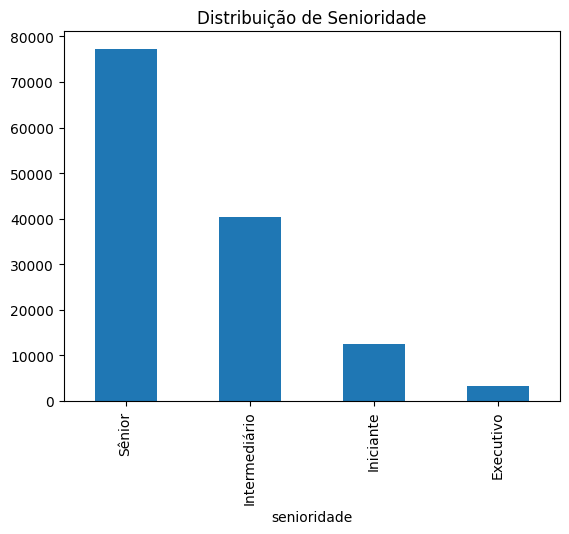

In [ ]:
df_limpo["senioridade"].value_counts().plot(kind="bar", title="Distribuição de Senioridade")

In [ ]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

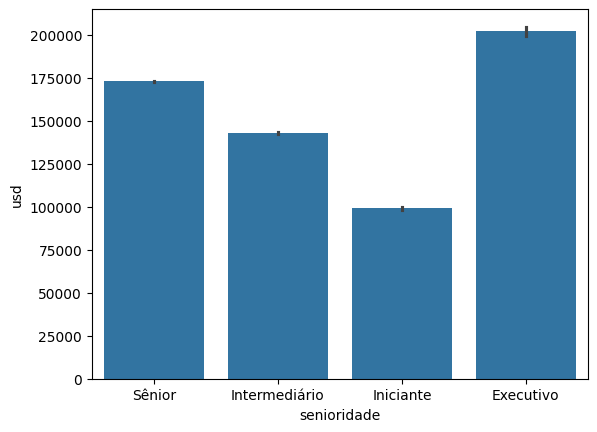

In [ ]:
sns.barplot(data=df_limpo, x="senioridade", y="usd")

In [ ]:
import matplotlib.pyplot as plt


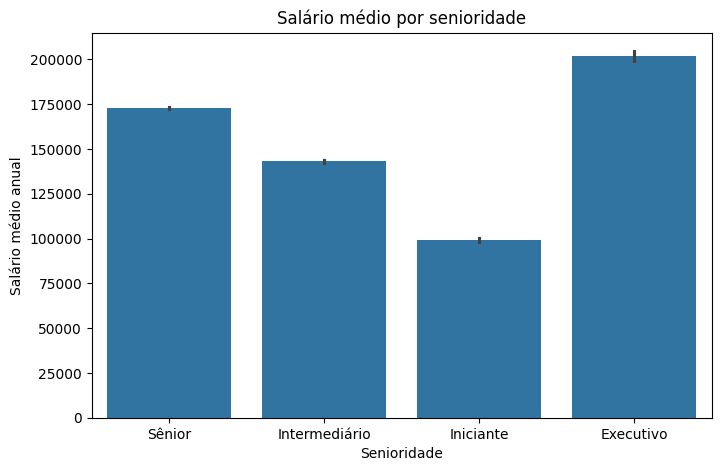

In [ ]:
plt.figure(figsize=(8, 5))

sns.barplot(data=df_limpo, x="senioridade", y="usd")
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual")

plt.show()

In [ ]:
df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=False)

,usd
senioridade,
Executivo,202027.667813
Sênior,172850.838301
Intermediário,143044.845979
Iniciante,99034.963267


In [ ]:
# Digitar ascending=False se quer do maior para o menor e digitar ascending=True se quer do menor para o maior.
ordem = df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=True).index

ordem

Index(['Iniciante', 'Intermediário', 'Sênior', 'Executivo'], dtype='object', name='senioridade')

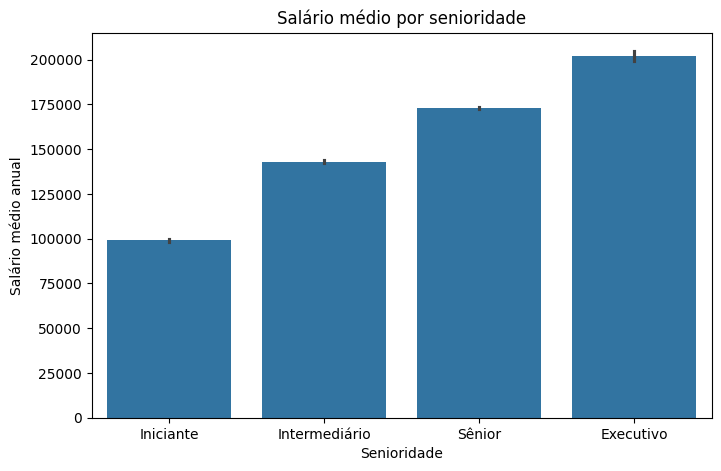

In [ ]:
plt.figure(figsize=(8, 5))

sns.barplot(data=df_limpo, x="senioridade", y="usd", order=ordem)
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual")

plt.show()

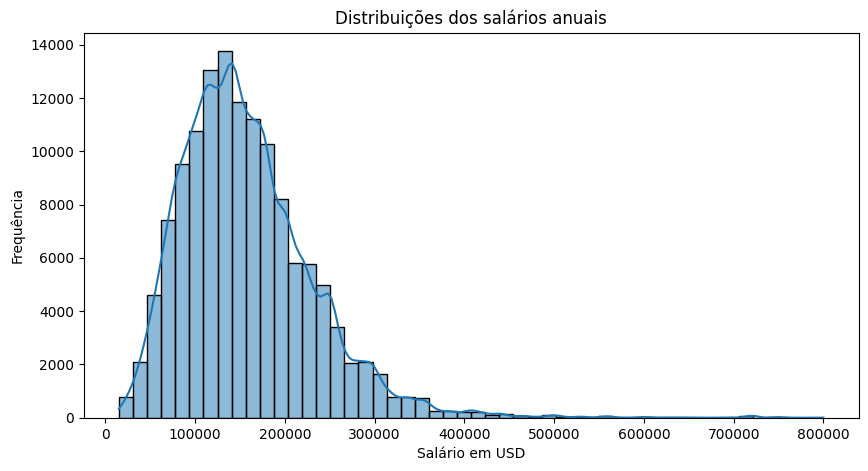

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_limpo["usd"], bins = 50, kde=True) #  kde=False deixa sem a linha e  kde=True com a linha e sempre montar o gráfico de uma maneira mais visível.

plt.title("Distribuições dos salários anuais")
plt.xlabel("Salário em USD")
plt.ylabel("Frequência")

plt.show()

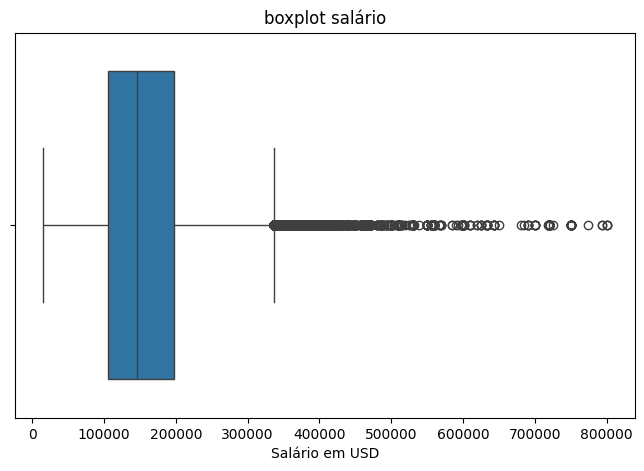

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_limpo["usd"])

plt.title("boxplot salário")
plt.xlabel("Salário em USD")


plt.show()

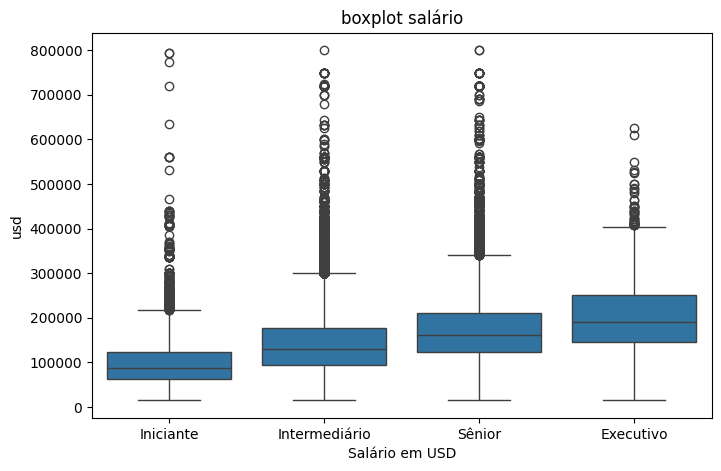

In [ ]:
ordem_senioridade = ['Iniciante', 'Intermediário', 'Sênior', 'Executivo']

plt.figure(figsize=(8, 5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade)

plt.title("boxplot salário")
plt.xlabel("Salário em USD")


plt.show()

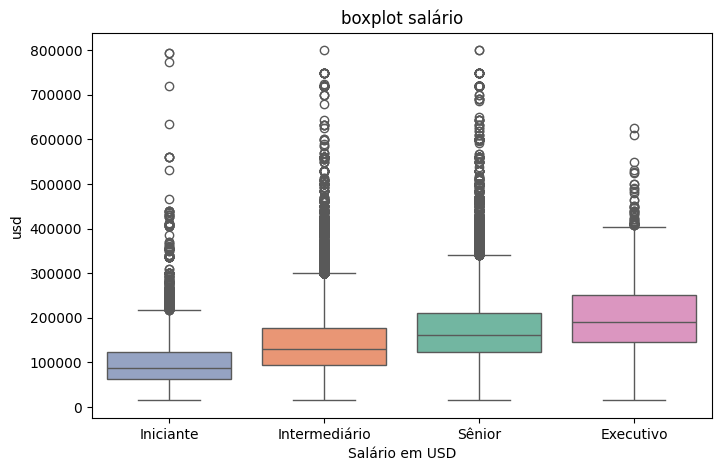

In [ ]:
ordem_senioridade = ['Iniciante', 'Intermediário', 'Sênior', 'Executivo']

plt.figure(figsize=(8, 5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette="Set2", hue='senioridade')

plt.title("boxplot salário")
plt.xlabel("Salário em USD")


plt.show()

In [ ]:
import plotly.express as px

In [ ]:
# Calculate the average salary by seniority
df_avg_salary = df_limpo.groupby("senioridade")["usd"].mean().reset_index()

# Define the order of seniority
ordem_senioridade = ['Iniciante', 'Intermediário', 'Sênior', 'Executivo']
df_avg_salary['senioridade'] = pd.Categorical(df_avg_salary['senioridade'], categories=ordem_senioridade, ordered=True)
df_avg_salary = df_avg_salary.sort_values('senioridade')


# Create the bar chart using Plotly Express
fig = px.bar(df_avg_salary,
             x="senioridade",
             y="usd",
             title="Salário médio por senioridade",
             labels={"senioridade": "Senioridade", "usd": "Salário médio anual"})

fig.show()

In [ ]:
remoto_contagem = df_limpo["remoto"].value_counts().reset_index()
remoto_contagem.columns = ["tipo_trabalho", "quantidade"]

fig = px.pie(remoto_contagem,
             names="tipo_trabalho",
             values="quantidade",
             title="Porporção dos tipos de trabalho")

fig.show()

In [ ]:
remoto_contagem = df_limpo["remoto"].value_counts().reset_index()
remoto_contagem.columns = ["tipo_trabalho", "quantidade"]

fig = px.pie(remoto_contagem,
             names="tipo_trabalho",
             values="quantidade",
             title="Porporção dos tipos de trabalho",
            hole=0.5)

fig.show()

In [ ]:
remoto_contagem = df_limpo["remoto"].value_counts().reset_index()
remoto_contagem.columns = ["tipo_trabalho", "quantidade"]

fig = px.pie(remoto_contagem,
             names="tipo_trabalho",
             values="quantidade",
             title="Porporção dos tipos de trabalho",
            hole=0.5)
fig.update_traces(textinfo="percent+label") # Acrescenta a palavra no gráfico de rosca exemplo foi "Remoto" e "Presencial".
fig.show()

# **- Desafio da aula 03**

In [ ]:
# Calculando a média do salário de ciêntista de dados por País.

df_data_scientist = df_limpo[df_limpo['cargo'] == 'Data Scientist']

df_avg_salary_country = df_data_scientist.groupby('empresa')['usd'].mean().reset_index()

df_avg_salary_country = df_avg_salary_country.sort_values('usd', ascending=False)


fig = px.bar(df_avg_salary_country,
             x="empresa",
             y="usd",
             title="Salário médio para Ciênstista de Dados por País",
             labels={"empresa": "País", "usd": "Salário médio anual"})

fig.show()

# **Codando o mapa da média salarial dos países**

In [ ]:
pip install pycountry

In [ ]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [ ]:
df_limpo.head()

,work_year,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média,USA
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média,USA
2,2025,Intermediário,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média,AUS
3,2025,Intermediário,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média,AUS
4,2025,Iniciante,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média,USA


In [ ]:
df_limpo.to_csv('Dados imersão final', index=False)

# **Aula 4 - Construindo um Dashboard com Streamlit**